In [112]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [113]:
with open('NBA Champion RawData.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    data = list(csv_reader)

In [114]:
champion_share_index = data[0].index('champion share')
for i in range(len(data)):
    data[i].pop(champion_share_index)

In [115]:
champion_index = data[0].index('champion')
data_np = np.array(data[1:])
labels = data_np[:, champion_index]
features = np.delete(data_np, champion_index, axis=1)

In [116]:
training_features, validation_features, training_labels, validation_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

In [117]:

feature_names = np.delete(data[0], champion_index)
label_names = ['champion']

train_features_df = pd.DataFrame(training_features, columns=feature_names)
train_labels_df = pd.DataFrame(training_labels, columns=label_names)
validation_features_df = pd.DataFrame(validation_features, columns=feature_names)
validation_labels_df = pd.DataFrame(validation_labels, columns=label_names)

In [118]:
train_features_df.head()

,ï»¿Season,Team/Season,Team,Team ID,Team ID/Season,Conference,Conference/Season,Conference 5=> rec,Conference OR,Conference SRS,...,3PAr,TS%,Offense Four Factors|eFG%,Offense Four Factors|TOV%,Offense Four Factors|ORB%,Offense Four Factors|FT/FGA,Defense Four Factors|eFG%,Defense Four Factors|TOV%,Defense Four Factors|DRB%,Defense Four Factors|FT/FGA
0,2022,Miami Heat 2022,Miami Heat,13,13 2022,East,East 2022,0.465412129,0.500813008,0.163333333,...,0.422,0.584,0.547,13.4,23.5,0.204,0.524,13.8,78,0.209
1,1997,Detroit Pistons 1997,Detroit Pistons,28,28 1997,East,East 1997,0.509481788,0.52601626,1.189333333,...,0.246,0.554,0.512,13,27.5,0.244,0.487,14.6,70.4,0.197
2,1984,Golden State Warriors 1984,Golden State Warriors,8,8 1984,West,West 1984,0.495857866,0.489837398,-0.445833333,...,0.03,0.52,0.471,14.9,35.6,0.254,0.519,17,64.2,0.25
3,1989,New Jersey Nets 1989,New Jersey Nets,10,10 1989,East,East 1989,0.528726653,0.530487805,1.170833333,...,0.079,0.517,0.474,15,32.7,0.229,0.508,14.4,70.1,0.244
4,1953,Rochester Royals 1953,Rochester Royals,23,23 1953,West,West 1953,0.528495754,0.522134546,0.708,...,0,0.455,0.372,0,0,0.369,0,0,0,0


In [119]:
# Selecting specific columns from the dataframe for further analysis
# selected_columns = ['rk conference', 'sum mvp shares', 'Conference OR', 'overall record', 'MOV']
# train_features_df = train_features_df[selected_columns]
# validation_features_df = validation_features_df[selected_columns]

#DELETE FIRST 3 ENTRIES(USELESS INFO)
train_features_df = train_features_df.iloc[:, 7:]
validation_features_df = validation_features_df.iloc[:, 7:]


In [120]:

train_features_df.head()

,Conference 5=> rec,Conference OR,Conference SRS,Conference Age,pre playoff odds,pre playoff odds rank,pre season odds,make playoffs,top 3 conference,rk conference,...,3PAr,TS%,Offense Four Factors|eFG%,Offense Four Factors|TOV%,Offense Four Factors|ORB%,Offense Four Factors|FT/FGA,Defense Four Factors|eFG%,Defense Four Factors|TOV%,Defense Four Factors|DRB%,Defense Four Factors|FT/FGA
0,0.465412129,0.500813008,0.163333333,26.06,1000,5,2500,1,1,1,...,0.422,0.584,0.547,13.4,23.5,0.204,0.524,13.8,78,0.209
1,0.509481788,0.52601626,1.189333333,27.62666667,2200,9,5000,1,0,5,...,0.246,0.554,0.512,13,27.5,0.244,0.487,14.6,70.4,0.197
2,0.495857866,0.489837398,-0.445833333,26.475,999999,17,0,0,0,9,...,0.03,0.52,0.471,14.9,35.6,0.254,0.519,17,64.2,0.25
3,0.528726653,0.530487805,1.170833333,27.03333333,999999,17,20000,0,0,11,...,0.079,0.517,0.474,15,32.7,0.229,0.508,14.4,70.1,0.244
4,0.528495754,0.522134546,0.708,26.8,0,1,0,1,1,2,...,0,0.455,0.372,0,0,0.369,0,0,0,0


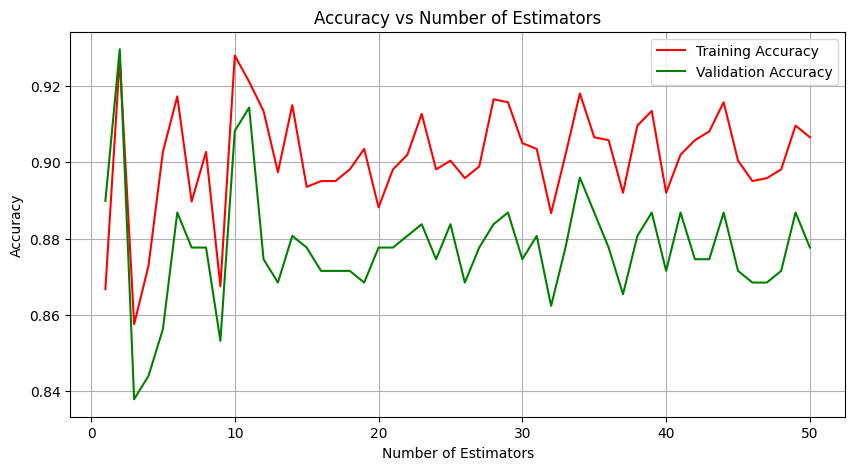

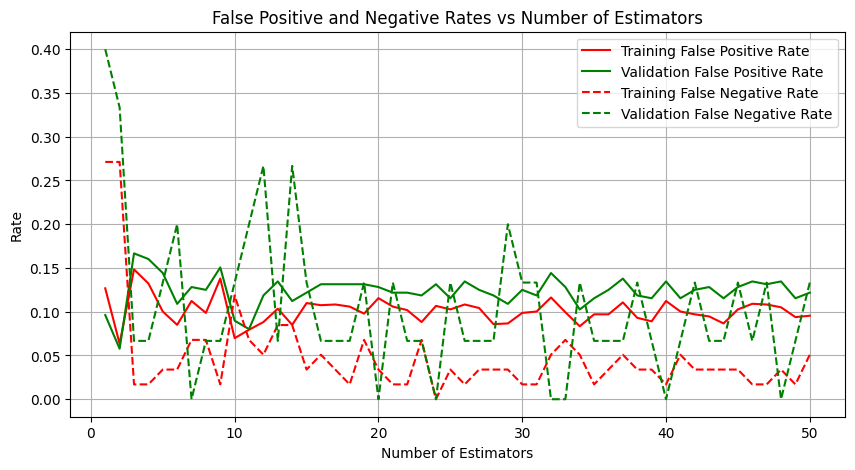

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

n_estimators_range = range(1, 51)
training_accuracies = []
validation_accuracies = []
training_false_positive_rates = []
training_false_negative_rates = []
validation_false_positive_rates = []
validation_false_negative_rates = []

class_weights = {'0': 1, '1': 22}


for n in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n,class_weight=class_weights, max_depth=3)
    model.fit(train_features_df, train_labels_df.values.ravel())  # Flatten the labels array
    
    # Training metrics
    training_predictions = model.predict(train_features_df)
    training_accuracy = accuracy_score(training_labels, training_predictions)
    training_accuracies.append(training_accuracy)
    tn, fp, fn, tp = confusion_matrix(training_labels, training_predictions).ravel()
    training_false_positive_rate = fp / (fp + tn)
    training_false_negative_rate = fn / (fn + tp)
    training_false_positive_rates.append(training_false_positive_rate)
    training_false_negative_rates.append(training_false_negative_rate)
    
    # Validation metrics
    validation_predictions = model.predict(validation_features_df)
    validation_accuracy = accuracy_score(validation_labels, validation_predictions)
    validation_accuracies.append(validation_accuracy)
    tn, fp, fn, tp = confusion_matrix(validation_labels, validation_predictions).ravel()
    validation_false_positive_rate = fp / (fp + tn)
    validation_false_negative_rate = fn / (fn + tp)
    validation_false_positive_rates.append(validation_false_positive_rate)
    validation_false_negative_rates.append(validation_false_negative_rate)

# Plotting Accuracy vs Number of Estimators
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, training_accuracies, label='Training Accuracy', color='red')
plt.plot(n_estimators_range, validation_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

# Plotting False Positive Rates and False Negative Rates
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, training_false_positive_rates, label='Training False Positive Rate', color='red', linestyle='-')
plt.plot(n_estimators_range, validation_false_positive_rates, label='Validation False Positive Rate', color='green', linestyle='-')
plt.plot(n_estimators_range, training_false_negative_rates, label='Training False Negative Rate', color='red', linestyle='--')
plt.plot(n_estimators_range, validation_false_negative_rates, label='Validation False Negative Rate', color='green', linestyle='--')
plt.xlabel('Number of Estimators')
plt.ylabel('Rate')
plt.title('False Positive and Negative Rates vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()




 